# Trabajo final: Analisis estadistico de señales de 1420 Mhz en busqueda de la señal Wow!

- Juan José tabares García 1007223478

En el año 1977 fue detectada una señal proveninete de una región de la constelación de sagitario en 1420 Mhz, en su punto de mayor intensidad alcanzo un valor de aproximadamente 30 σ, esto es, 30 veces la señal de ruido promedio del universo, la señal no ha sido detectada nuevamente en esa area del espacio desde entonces y aun hay mucho debate sobre su posible origen

Si bien no podemos buscar señales de 1420Mhz manualmente con un radiotelescopio podemos hacer un analisis de señales previamente identifdicadas con la ayuda de python y las libreriras de pandas, matplotlib, scipy y numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections 
from scipy.stats import poisson

## Creacion y orden del Dataframe

El dataframe es obtenido desde el Master Radio Catalogue, especificamente el Candain Radio Catalogue (https://heasarc.gsfc.nasa.gov/W3Browse/radio-catalog/cgpsngpcat.html) 

los parametros extraidos son unicamente sus coordenadas galacticas, el archivo es descargado desde la pagina en formato xlx y posteriormente convertido a csv, los datos se encuentran en la segunda pagina, este codigo fue diseñado para correr en un entorno de escritorio y no en una plataforma como colab (Aunque puede modificarse para que funcione de esta manera)

El archivo con los datos usado especificamente puede ser obtenido de:
(https://drive.google.com/file/d/1DuB_pebgA46B1o5sbqBAd64Wc05mxxWK/view?usp=share_link)

Hay que tener en cuenta que el archivo debe ser renombrado a Data_galactic.csv o cambiar la primera linea del codigo

In [2]:
signals = pd.read_csv("Data_galactic.csv",sep=";")
signals.columns = ["lii","bii","int"]
signals = signals[1:]

#Se añaden otras dos columnas con los valores de longitud y latitud en radianes para graficación
signals["LonG (rad)"] = [np.radians(x) for x in signals["lii"]]
signals["LatG (rad)"] = [np.radians(x) for x in signals["bii"]]

#Esta columna será de utilidad mas adelante en el codigo
signals["int (σ)"] = [x/1.2 for x in signals["int"]]

signals

,lii,bii,int,LonG (rad),LatG (rad),int (σ)
1,52.30310,-1.60952,14.2,0.912861,-0.028091,11.833333
2,52.22137,-1.22940,10.9,0.911435,-0.021457,9.083333
3,52.90004,-2.40166,11.0,0.923280,-0.041917,9.166667
4,53.22714,-2.97873,73.8,0.928989,-0.051989,61.500000
5,52.21493,-1.15976,45.1,0.911322,-0.020242,37.583333
...,...,...,...,...,...,...
65530,107.82076,10.24546,3.6,1.881827,0.178817,3.000000
65531,110.71319,8.31746,16.2,1.932310,0.145167,13.500000
65532,122.19220,5.05748,6.4,2.132656,0.088270,5.333333
65533,110.49001,8.44867,1.7,1.928414,0.147457,1.416667


## Graficación y analisis principal

Con el fin de tener una idea gráfica de que area del cielo estamos tomando como muestra se grafican los datos usando una proyeccion tridimensional, los datos fueron pasados en radianes ya que la proyeccion usada por matplotlib asi lo requiere, cada punto rojo representa una señal de 1420 MHz sobre el fondo galactico en sus respectivad coordenadas

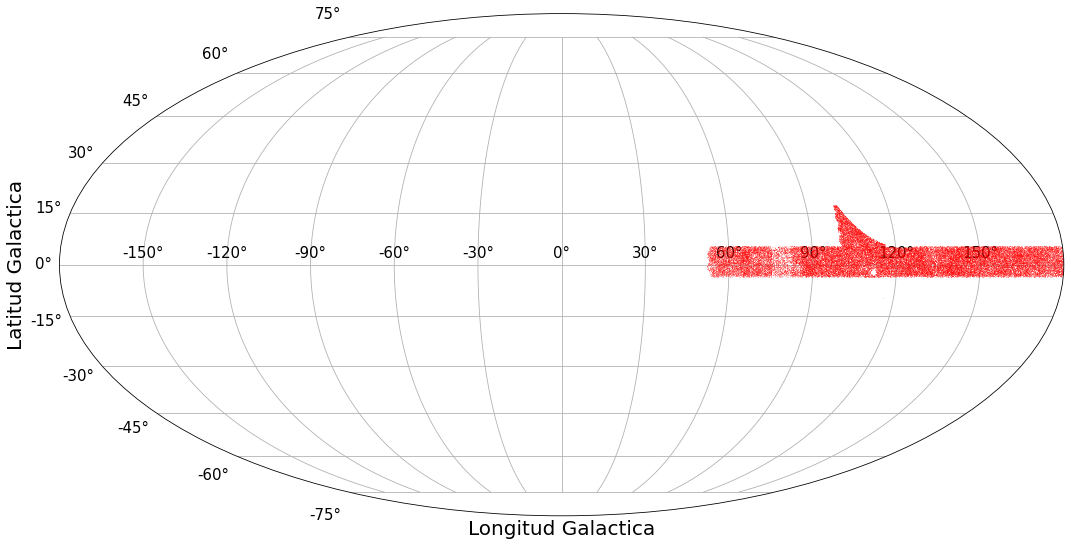

In [3]:
def plotGraph():
    plt.figure(figsize=(18,12))
    plt.subplot(projection="mollweide")
    plt.grid(True)
    plt.plot(signals["LonG (rad)"],signals["LatG (rad)"],"r*",ms=0.05)
    plt.xlabel("Longitud Galactica",fontsize=20)
    plt.ylabel("Latitud Galactica",fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)

plotGraph()

Entre la longitud de 90° y 120° se denota un pico que se desvia de la banda de los datos tomados, ya que esta es una distribución de tipo poisson queremos estar seguros que las dimensiones del area sobre la cual vamos a hacer nuestra ssubdivisiones y posteriores conteos de frecuencia esta bien definida y es homogenea, por lo tanto se seleccionará una sub-area dentro de la banda principal de datos que contenga tantos como sea posible dejando algunos datos cerca de la frontera de datos tomados por fuera de esta, para esto, primero analizaremos el rango de nuestros datos:

In [4]:
print("min / max latitud galactica:",min(signals["bii"]),max(signals["bii"]))
print("min / max longitud galactica:",min(signals["lii"]),max(signals["lii"]))

min / max latitud galactica: -9.77512 17.52744
min / max longitud galactica: 52.00183 192.88337


El valor maximo de latitud corresponde al pico encontrado en la grafica anterior, la mayoria de datos se encuentran en la banda de los -5 a 5 grados de latitud galactica, a modo de ajuste manual (considerando solo el resultado grafico) y despues de considerar varias opciones se decidió establecer los limites del area de estudio de los datos encontrados enre los -3° y 5° de latitud y los 55° y 180° de longitud

## Area de estudio

A partir del data frame original se filtran los resultados con los valores de latitud y longitud deseadas, despues se grafican sobre el grafico anterior para denotar la area que va a ser usada, notesé como hay un fino borde de datos rojos que no son tomados cerca de las fronteras.

In [5]:
areadf = pd.DataFrame.copy(signals)

#Filtering values getting only lattitudes between -9 and 9 
filterlat = areadf[ (areadf["bii"] <= -3) | (areadf["bii"] >= 5) ].index
areadf.drop(filterlat, inplace=True)

#Filtering values getting only longitudes from 52 degrees to 192 degrees
filterlon = areadf[ (areadf["lii"] <= 55) | (areadf["lii"] >= 180)].index
areadf.drop(filterlon, inplace=True)

areadf

,lii,bii,int,LonG (rad),LatG (rad),int (σ)
287,55.16277,-2.88960,22.7,0.962772,-0.050433,18.916667
317,55.25103,-2.88862,6.7,0.964312,-0.050416,5.583333
320,55.26861,-2.87535,3.4,0.964619,-0.050184,2.833333
333,55.17988,-2.65729,4.2,0.963071,-0.046378,3.500000
337,55.31650,-2.87225,8.0,0.965455,-0.050130,6.666667
...,...,...,...,...,...,...
65417,123.42279,4.97626,4.5,2.154134,0.086852,3.750000
65431,122.17316,4.99332,2.4,2.132324,0.087150,2.000000
65434,122.71994,4.98306,5.3,2.141867,0.086971,4.416667
65439,122.73856,4.98638,9.2,2.142192,0.087029,7.666667


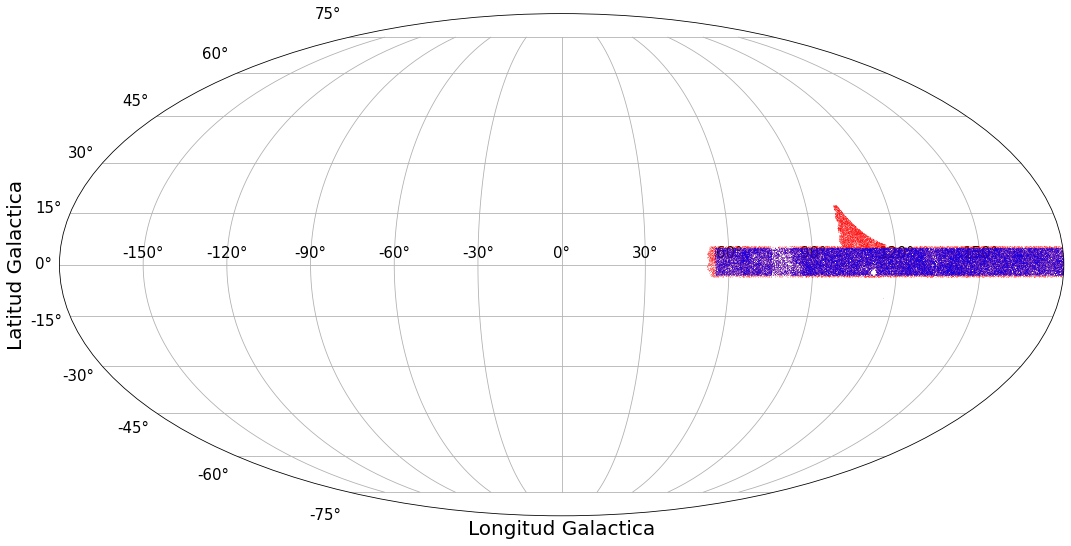

In [6]:
plotGraph()
plt.plot(areadf["LonG (rad)"],areadf["LatG (rad)"],"b*",ms=0.05)

Este nuevo dataframe (areadf) contiene nuestra información de interés, para visualizarlo mejor haremos una grafica en una proyección plana de los datos segun el sistema de coordenadas:

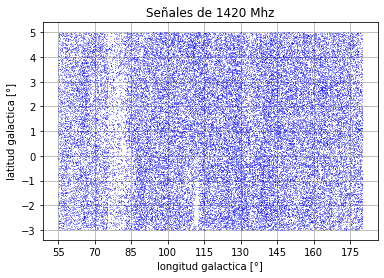

In [7]:
plt.plot(areadf["lii"],areadf["bii"],"b*",ms=0.1)
plt.title("Señales de 1420 Mhz")
plt.xlabel("longitud galactica [°]")
plt.ylabel("latitud galactica [°]")
plt.grid()

xticks = [i for i in range(55,181,15)]
plt.xticks(xticks,[str(x) for x in xticks]);

## Paso intermedio: coordenadas de las señales a tuplas

Antes de hacer nuestro conteo de frecuencias almacenaremos cada señal como una tupla con sus coordenadas como parametros, esto es: (longitud galactica,latitud galactica) cada una de estas tuplas (que representa una señal) es almacenada una lista que será analizada por el codigo más adelante

In [8]:
data_num = len(areadf["lii"].values)
lii = areadf["lii"].values
bii = areadf["bii"].values

data_coord = []

for i in range(0,data_num):
    data_coord.append((lii[i],bii[i]))

data_coord

[(55.16277, -2.8896),
 (55.25103, -2.88862),
 (55.26861, -2.87535),
 (55.17988, -2.65729),
 (55.3165, -2.87225),
 (55.22848, -2.70695),
 (55.41187, -2.91974),
 (55.27211, -2.64074),
 (55.1665, -2.41403),
 (55.11796, -2.30819),
 (55.24514, -2.44736),
 (55.07369, -2.11513),
 (55.02791, -1.99654),
 (55.27324, -2.41249),
 (55.13538, -2.13216),
 (55.49001, -2.74364),
 (55.40516, -2.58087),
 (55.4909, -2.72676),
 (55.52109, -2.77354),
 (55.50042, -2.64684),
 (55.38665, -2.44431),
 (55.26828, -2.11633),
 (55.20307, -1.99932),
 (55.15369, -1.90556),
 (55.71521, -2.87429),
 (55.64399, -2.72045),
 (55.55187, -2.55133),
 (55.21517, -1.94882),
 (55.16738, -1.85487),
 (55.54281, -2.47745),
 (55.01946, -1.52851),
 (55.19306, -1.81186),
 (55.90336, -2.9913),
 (55.12458, -1.62536),
 (55.25968, -1.8631),
 (55.08069, -1.54412),
 (55.36405, -1.99522),
 (55.18577, -1.62649),
 (55.87566, -2.73566),
 (55.41697, -1.90329),
 (55.836, -2.62316),
 (55.86965, -2.63501),
 (56.02516, -2.89311),
 (55.27126, -1.5396

## Separacion de secciones y conteo de frecuencias

Para hacer el conteo de frecuencias de cada sección se hará una matriz, la matriz tiene las dimensiones resultantes de la dimension de las secciones y cada enntrada de la matriz representará la frecuencia en cada división.

A continucación hay una pequeña demostración de la idea detrás del procesamiento de datos, si vamos a tomar divisiones de forma tal que la imagen quede divida en un patrón rectangular de 3x2 se creará una matriz con estas dimensiones.

$\Delta x$ y $\Delta y$ representan el largo de las subdivisiones horizontal y verticalmente en grados.

La matriz primero es creada con todas sus entradas en zeros, luego, a medida que se recorre la lista con las tuplas de coordenadas se va a umentando su valor en 1 segun la posicion que corresponde

![](https://raw.githubusercontent.com/42tabares/Images/main/FISEXPIII/wow!/matrixdata.png)

con el fin de poder reutilizar esta secuencia en especifico para varias divisiones se definidra como una funcion, es importante denotar que muchos de los valores de la funcion son variables globales previamente definidas y los unicos parametros de la funcion sera el tamaño de las subdivisiones que como ya ha sido mencionado deben ser pasados como decimales de grado

In [9]:
start_x = 55
end_x = 180
start_y = -3
end_y = 5

def subdivide(Δx,Δy):

    #Aqui se definen las dimensiones de la matriz y se construye
    x_size = int((end_x-start_x)/Δx)
    y_size = int((end_y-start_y)/Δy)
    data_matrix = np.zeros((x_size,y_size))

    #Aqui se recorre la lista, para cada elemento se obtiene la subdivision a que corresponde cada entrada
    for coord in data_coord:
        i = int((coord[0]-start_x)/Δx)
        j = int((coord[1]-start_y)/Δy)

        data_matrix[i][j] += 1

    #Al final, retornamos la matriz donde han sido contadas las frecuencias.
    return data_matrix

#Esta funcion será usada para printear la información estadistica de la matriz (tabla de frecuencias)
def infoprint(m):
    c = collections.Counter(m.flatten())
    print("λ = ",m.mean())
    for k,v in c.items():
        print(k,v)
    print("Probabilidad de encontrar al menos una estrella en una subdivisión:",(1 - poisson.pmf(0,m.mean())))


## Subdivisiones y conteo

Usando subdivisiones de 3' por 3', esto es, cuadrados homogeneos de 0.05 grados de lado obtenemos:

In [10]:
matrix3 = subdivide(0.05,0.05)

infoprint(matrix3)

λ =  0.1302325
0.0 350952
1.0 46126
2.0 2803
3.0 116
4.0 2
5.0 1
Probabilidad de encontrar al menos una estrella en una subdivisión: 0.12210870253569384


El resultado es de un valor medio (lambda) pequeño, esto indica que por lo menos en una region similar a la de posible detección de la señal Wow! hay pocas probabilidades de encontrar al menos una estrella, como veremeos y como es de esperarse este valor aumenta a medida aumentamos el area de la subdivision a 6' por 6' y a 12' por 12'

In [11]:
matrix6 = subdivide(0.1,0.1)

infoprint(matrix6)

λ =  0.52093
0.0 59729
1.0 30430
2.0 8127
4.0 191
3.0 1487
6.0 4
5.0 32
Probabilidad de encontrar al menos una estrella en una subdivisión: 0.40603209911868954


In [12]:
matrix12 = subdivide(0.2,0.2)

infoprint(matrix12)

λ =  2.08372
1.0 6334
2.0 6147
4.0 2531
0.0 3700
3.0 4527
6.0 422
5.0 1115
7.0 159
10.0 2
11.0 1
9.0 13
8.0 49
Probabilidad de encontrar al menos una estrella en una subdivisión: 0.8755336648445532


In [13]:
matrix15 = subdivide(0.25,0.25)

infoprint(matrix15)

λ =  3.2558125
1.0 2196
2.0 3088
3.0 3255
6.0 1094
4.0 2625
0.0 926
5.0 1799
7.0 547
8.0 275
10.0 58
9.0 114
11.0 17
12.0 4
14.0 1
13.0 1
Probabilidad de encontrar al menos una estrella en una subdivisión: 0.9614505135221783


# Analisis de los resultados mediante la distribucion de poisson

Una vez obtenidos nuestros valores de lambda podmeos construir una grafica demostrando el comportamiento de la distribucion de poisson para los valores obtenidos, podemos concluir que dadas las divisiones pequeñas (<1°) encontrar una señal similar (al menos de una fuente estatica) es poco comun pero no imposible



(-0.5, 7.0)

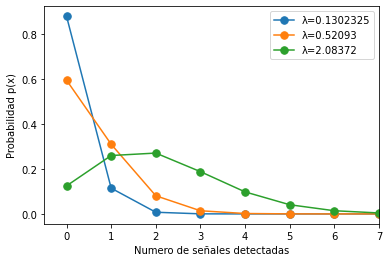

In [14]:
bundle_matrix = [matrix3.mean(),matrix6.mean(),matrix12.mean()]
color = ["b.","r.","g.","y."]
color2 = ["b-","r-","g-","y-"]
xaxis = np.linspace(0,14)

xaxis= np.linspace(0,30,31)
proba = np.zeros(len(xaxis))

for la in bundle_matrix:
    for i in range(len(proba)):
        proba[i] = poisson.pmf(xaxis[i], la)
    plt.plot(proba,marker='.',ms=15,label=("λ="+str(la)))

plt.title("")
plt.xlabel("Numero de señales detectadas")
plt.ylabel("Probabilidad p(x)")
plt.legend()
plt.xlim(-0.5,7)

    

# Analisis de intensidades 

este valor fue de 30.5 ±
0.5  para la señal wow  para las señales del catálogo
el valor medio de intensidad es de 20 ± 116  la
desviación estándar es casi 6 veces más que el valor medio
debido a que los valores más altos de intensidad rondan los
6000 u 8000 σ, sin embargo, el 91% de entradas está
considerado en el rango de 0 a 40 σ

19.957559876886847
122.651235442936
91.71481772982935


Text(0, 0.5, 'Frequency')

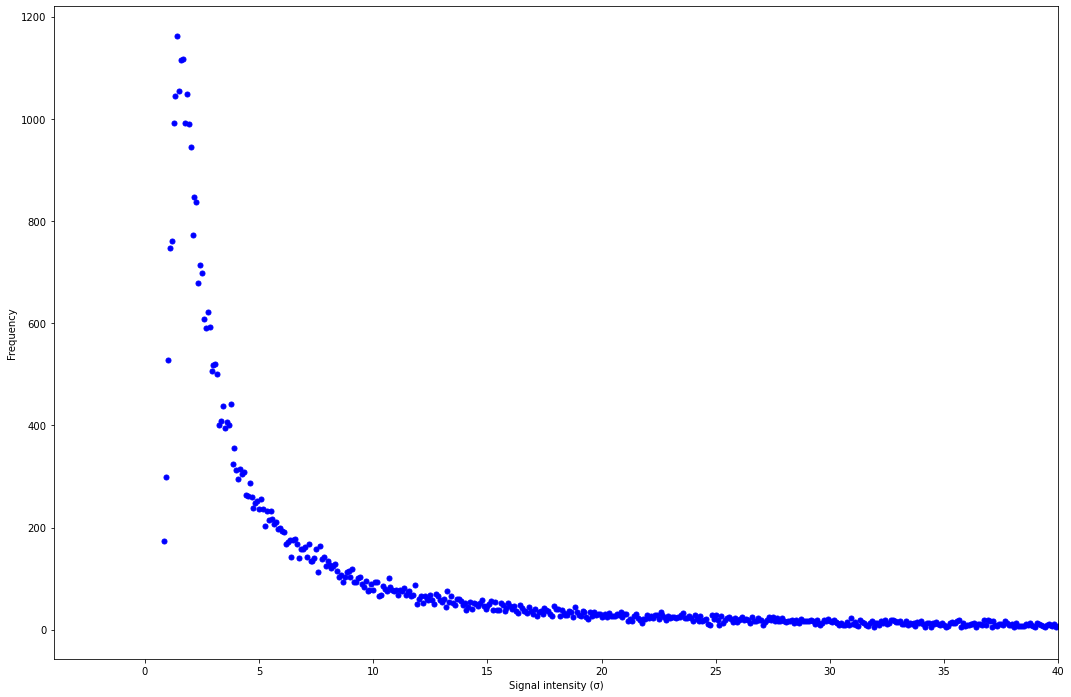

In [15]:
intensities = areadf["int (σ)"].values



print(np.mean(intensities))
print(np.std(intensities))

plt.figure(figsize=(18,12))

freq_intensities = collections.Counter(intensities)

filterlon = areadf[ (areadf["lii"] <= 55) | (areadf["lii"] >= 180)].index

pd_intsub40 = areadf[ areadf["int (σ)"] <= 40]
ratio = (len(intensities) - len(pd_intsub40["int (σ)"].values)) / len(intensities)
percentage = (1 - ratio) * 100 
print(percentage)

for k,v in freq_intensities.items():
    plt.plot(k,v,"b.",ms=10)


plt.xlim(-4,40)
plt.xlabel("Signal intensity (σ)")
plt.ylabel("Frequency")



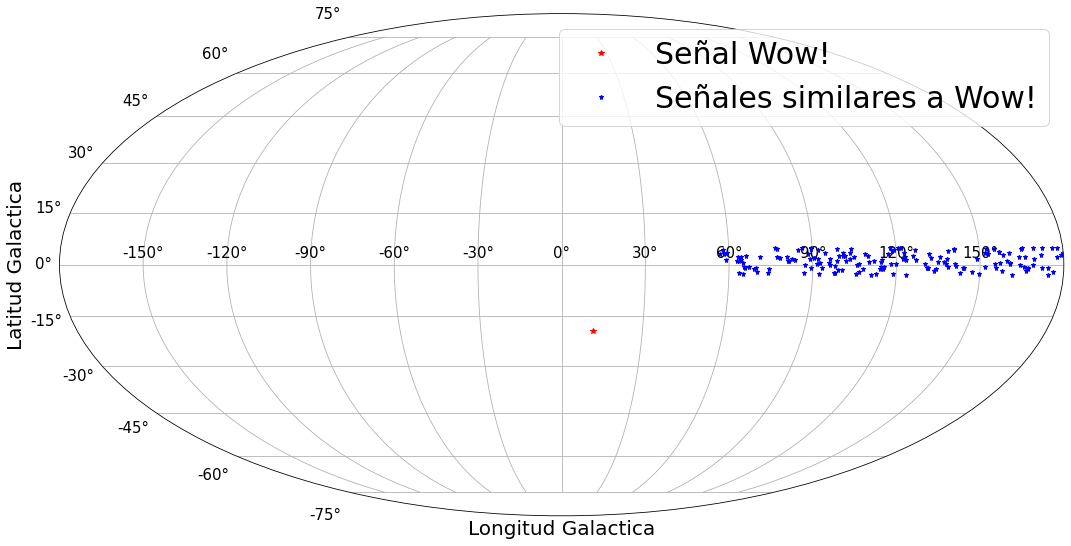

In [16]:
filter30 = areadf[ (areadf["int (σ)"] >= 30) & (areadf["int (σ)"] < 31)]

plt.figure(figsize=(18,12))
plt.subplot(projection="mollweide")
plt.grid(True)
plt.plot(np.radians(11.7),np.radians(-19.3),"r*",label="Señal Wow!")
plt.plot(filter30["LonG (rad)"],filter30["LatG (rad)"],"b*",ms=5,label="Señales similares a Wow!")
plt.xlabel("Longitud Galactica",fontsize=20)
plt.ylabel("Latitud Galactica",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(prop={'size': 30})